In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy import stats

plt.style.use("ggplot")
rcParams["figure.figsize"] = [12, 9]
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/tweet_output_predictions.csv', parse_dates=["Date"], index_col="Date")

In [ ]:
new_df = df[df.Labels != 'Irrelevant']

# new_df

In [ ]:
sentiment = []
for index, row in new_df.iterrows():
  if row['Labels'] == "Positive":
    sentiment.append(1)
  elif row['Labels'] == "Neutral":
    sentiment.append(0)
  else: 
    sentiment.append(-1)


In [ ]:
new_df['Sentiment'] = sentiment
# new_df

In [ ]:
ndf = new_df[["Sentiment"]]
new = ndf.reset_index()

new
new['Date'] = pd.to_datetime(new['Date']).dt.date
# new

In [ ]:

b_date = new.groupby(by='Date').mean()
cc = b_date.reset_index()
cc

,Date,Sentiment
0,2020-03-01,0.562500
1,2020-03-02,0.358491
2,2020-03-03,0.392157
3,2020-03-04,0.280000
4,2020-03-05,0.424242
...,...,...
760,2022-03-31,0.217742
761,2022-04-01,0.328467
762,2022-04-02,0.265487
763,2022-04-03,0.062500


In [ ]:
title = []
for i in range(0, 493):
  title.append("Before_Delta_Variant")


title1 = []
for i in range(0, 272):
  title1.append("After_Delta_Variant")

Final_title = title + title1

len(Final_title)

cc['Title'] = Final_title
cc 

new_cc = cc[['Date','Title', 'Sentiment']]
new_cc

,Date,Title,Sentiment
0,2020-03-01,Before_Delta_Variant,0.562500
1,2020-03-02,Before_Delta_Variant,0.358491
2,2020-03-03,Before_Delta_Variant,0.392157
3,2020-03-04,Before_Delta_Variant,0.280000
4,2020-03-05,Before_Delta_Variant,0.424242
...,...,...,...
760,2022-03-31,After_Delta_Variant,0.217742
761,2022-04-01,After_Delta_Variant,0.328467
762,2022-04-02,After_Delta_Variant,0.265487
763,2022-04-03,After_Delta_Variant,0.062500


In [ ]:
before = new_cc[new_cc["Title"] == "Before_Delta_Variant"]["Sentiment"]
after = new_cc[new_cc["Title"] == "After_Delta_Variant"]["Sentiment"]

In [ ]:
scipy.stats.ttest_ind(list(before), list(after))

Ttest_indResult(statistic=-6.100203580730322, pvalue=1.6831603017989781e-09)

**Gamma Variant**

In [ ]:
ca = b_date.reset_index()
# ca.head(331)

In [ ]:
title = []
for i in range(0, 330):
  title.append("Before_Gamma_Variant")


title1 = []
for i in range(0, 435):
  title1.append("After_Gamma_Variant")

Final_title = title + title1

len(Final_title)

ca['Title'] = Final_title
cc 

new_ca = ca[['Date','Title', 'Sentiment']]
new_ca

,Date,Title,Sentiment
0,2020-03-01,Before_Gamma_Variant,0.562500
1,2020-03-02,Before_Gamma_Variant,0.358491
2,2020-03-03,Before_Gamma_Variant,0.392157
3,2020-03-04,Before_Gamma_Variant,0.280000
4,2020-03-05,Before_Gamma_Variant,0.424242
...,...,...,...
760,2022-03-31,After_Gamma_Variant,0.217742
761,2022-04-01,After_Gamma_Variant,0.328467
762,2022-04-02,After_Gamma_Variant,0.265487
763,2022-04-03,After_Gamma_Variant,0.062500


In [ ]:
before1 = ca[new_cc["Title"] == "Before_Gamma_Variant"]["Sentiment"]
after1 = ca[new_cc["Title"] == "After_Gamma_Variant"]["Sentiment"]

In [ ]:
scipy.stats.ttest_ind(list(before1), list(after1))

Ttest_indResult(statistic=nan, pvalue=nan)

** Beta Variant **  Date : 01-25-2021

In [ ]:
cb = b_date.reset_index()

In [ ]:
title = []
for i in range(0, 333):
  title.append("Before_Beta_Variant")


title1 = []
for i in range(0, 432):
  title1.append("After_Beta_Variant")

Final_title = title + title1

len(Final_title)

cb['Title'] = Final_title
cc 

new_cb = cb[['Date','Title', 'Sentiment']]
new_cb

,Date,Title,Sentiment
0,2020-03-01,Before_Beta_Variant,0.562500
1,2020-03-02,Before_Beta_Variant,0.358491
2,2020-03-03,Before_Beta_Variant,0.392157
3,2020-03-04,Before_Beta_Variant,0.280000
4,2020-03-05,Before_Beta_Variant,0.424242
...,...,...,...
760,2022-03-31,After_Beta_Variant,0.217742
761,2022-04-01,After_Beta_Variant,0.328467
762,2022-04-02,After_Beta_Variant,0.265487
763,2022-04-03,After_Beta_Variant,0.062500


In [ ]:
before2 = cb[cb["Title"] == "Before_Beta_Variant"]["Sentiment"]
after2 = cb[cb["Title"] == "After_Beta_Variant"]["Sentiment"]

In [ ]:
scipy.stats.ttest_ind(list(before2), list(after2))

Ttest_indResult(statistic=-23.775867773758677, pvalue=6.193214435166034e-94)

ANOVA test

In [ ]:
Positive = []
for index, row in new_df.iterrows():
  if row['Labels'] == "Positive":
    Positive.append(1)
  else: 
    Positive.append(0)

new_df['Positive'] = Positive

negative = []
for index, row in new_df.iterrows():
  if row['Labels'] == "Negative":
    negative.append(1)
  else: 
    negative.append(0)

new_df['Negative'] = negative
# new_df


neutral = []
for index, row in new_df.iterrows():
  if row['Labels'] == "Neutral":
    neutral.append(1)
  else: 
    neutral.append(0)

new_df['Neutral'] = neutral
new_df = new_df.reset_index()
new_df


,Date,Unnamed: 0,Unnamed: 0.1,Phrase,Tweet ID,Content,Username,Location,Place,Coordinates,Verified,FollowerCount,retweetCount,Language,Labels,Sentiment,Positive,Negative,Neutral
0,2020-03-01 22:18:28+00:00,0,0,COVID19Vaccine,1.230000e+18,@SenSchumer Of course. Anything else would be...,redirectloop,"California, United States",NaN,NaN,False,2747.0,0.0,en,Neutral,0,0,0,1
1,2020-03-01 12:27:16+00:00,1,1,COVID19Vaccine,1.230000e+18,"COVID-19 Vaccine Shipped, and Drug Trials Star...",nou2555,rPod Coworking Space,NaN,NaN,False,596.0,0.0,en,Neutral,0,0,0,1
2,2020-03-01 23:26:51+00:00,4,5,COVIDVaccine,1.230000e+18,Worthless comparison\nPeople get vaccinated ag...,EuroInSC,"South Carolina, United States",NaN,NaN,False,1026.0,0.0,en,Neutral,0,0,0,1
3,2020-03-01 20:02:13+00:00,5,7,COVIDVaccine,1.230000e+18,@BreitbartNews People like him are the ones th...,enfield1014,United States,NaN,NaN,False,636.0,0.0,en,Neutral,0,0,0,1
4,2020-03-01 19:02:15+00:00,6,9,COVIDVaccine,1.230000e+18,"If they get a #COVID vaccine, how many anti-va...",catosletters,Canada,NaN,NaN,False,2506.0,2.0,en,Positive,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111047,2022-04-03 23:20:00+00:00,123016,222219,Covidvaccine,1.510000e+18,Australia news live updates: fourth Covid vacc...,AustraliaPM,Australia,NaN,NaN,False,7156.0,0.0,en,Neutral,0,0,0,1
111048,2022-04-03 23:11:44+00:00,123017,222220,Covidvaccine,1.510000e+18,What are they dying from the covid vaccine? ht...,HankOSkilz,United States,NaN,NaN,False,581.0,0.0,en,Negative,-1,0,1,0
111049,2022-04-03 23:10:25+00:00,123018,222221,Covidvaccine,1.510000e+18,@RWranglebury @DCLbeacher444 I am COVID vaccin...,rvplace14,"Michigan, United States",NaN,NaN,False,2161.0,0.0,en,Negative,-1,0,1,0
111050,2022-04-04 23:24:30+00:00,123019,222222,Covidvaccine,1.510000e+18,@NathanStall Thereâs is absolutely no reason...,InOnterrible,Canada,NaN,NaN,False,1344.0,0.0,en,Positive,1,1,0,0


In [ ]:
newdf = new_df[['Date', 'Positive', 'Negative', 'Neutral']]
newdf

,Date,Positive,Negative,Neutral
0,2020-03-01 22:18:28+00:00,0,0,1
1,2020-03-01 12:27:16+00:00,0,0,1
2,2020-03-01 23:26:51+00:00,0,0,1
3,2020-03-01 20:02:13+00:00,0,0,1
4,2020-03-01 19:02:15+00:00,1,0,0
...,...,...,...,...
111047,2022-04-03 23:20:00+00:00,0,0,1
111048,2022-04-03 23:11:44+00:00,0,1,0
111049,2022-04-03 23:10:25+00:00,0,1,0
111050,2022-04-04 23:24:30+00:00,1,0,0


In [ ]:
 newdf['Date'] = pd.to_datetime(newdf['Date']).dt.date

newdf = newdf.sort_values(by = 'Date').reset_index()
newdf

df1 = newdf[['Date', 'Positive','Negative', 'Neutral']]
df1






,Date,Positive,Negative,Neutral
0,2020-03-01,0,0,1
1,2020-03-01,1,0,0
2,2020-03-01,1,0,0
3,2020-03-01,1,0,0
4,2020-03-01,1,0,0
...,...,...,...,...
111047,2022-04-04,1,0,0
111048,2022-04-04,0,0,1
111049,2022-04-04,1,0,0
111050,2022-04-04,1,0,0


In [ ]:
ma = df1.loc[:64955]
ma

ma = ma.groupby(by='Date').mean()
ma = ma.mean()
round(ma, 2)

Positive    0.44
Negative    0.18
Neutral     0.38
dtype: float64

In [ ]:
make = df1.loc[64956:]
# ma

make = make.groupby(by='Date').mean()
make = make.mean()
round(make, 2)

Positive    0.53
Negative    0.20
Neutral     0.27
dtype: float64

In [ ]:
# C0 = ['Positive', 'Negative', 'Neutral']
# C1 = [63.89, 20.71, 47.16]
# C2 = [91.27, 32.62, 45.57]


In [ ]:
C0 = ['Positive', 'Negative', 'Neutral']
C1 = [0.44, 0.18, 0.38]
C2 = [0.53, 0.20, 0.27]

In [ ]:
final = pd.DataFrame(
    {'Sentiments': C0,
     'Before_Delta_Variant': C1,
     'After_Delta_Variant': C2
    })
final


,Sentiments,Before_Delta_Variant,After_Delta_Variant
0,Positive,0.44,0.53
1,Negative,0.18,0.20
2,Neutral,0.38,0.27


In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [ ]:
res = smf.ols('Before_Delta_Variant ~ After_Delta_Variant', final).fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     Before_Delta_Variant   R-squared:                       0.660
Model:                              OLS   Adj. R-squared:                  0.320
Method:                   Least Squares   F-statistic:                     1.943
Date:                  Thu, 28 Apr 2022   Prob (F-statistic):              0.396
Time:                          02:27:56   Log-Likelihood:                 3.9527
No. Observations:                     3   AIC:                            -3.905
Df Residuals:                         1   BIC:                            -5.708
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

In [ ]:
res = smf.ols('Before_Delta_Variant ~ After_Delta_Variant', final).fit()
table = sm.stats.anova_lm(res, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table

,sum_sq,df,F,PR(>F)
After_Delta_Variant,0.024471,1.0,1.942829,0.396189
Residual,0.012596,1.0,NaN,NaN


**Time Series Analysis**

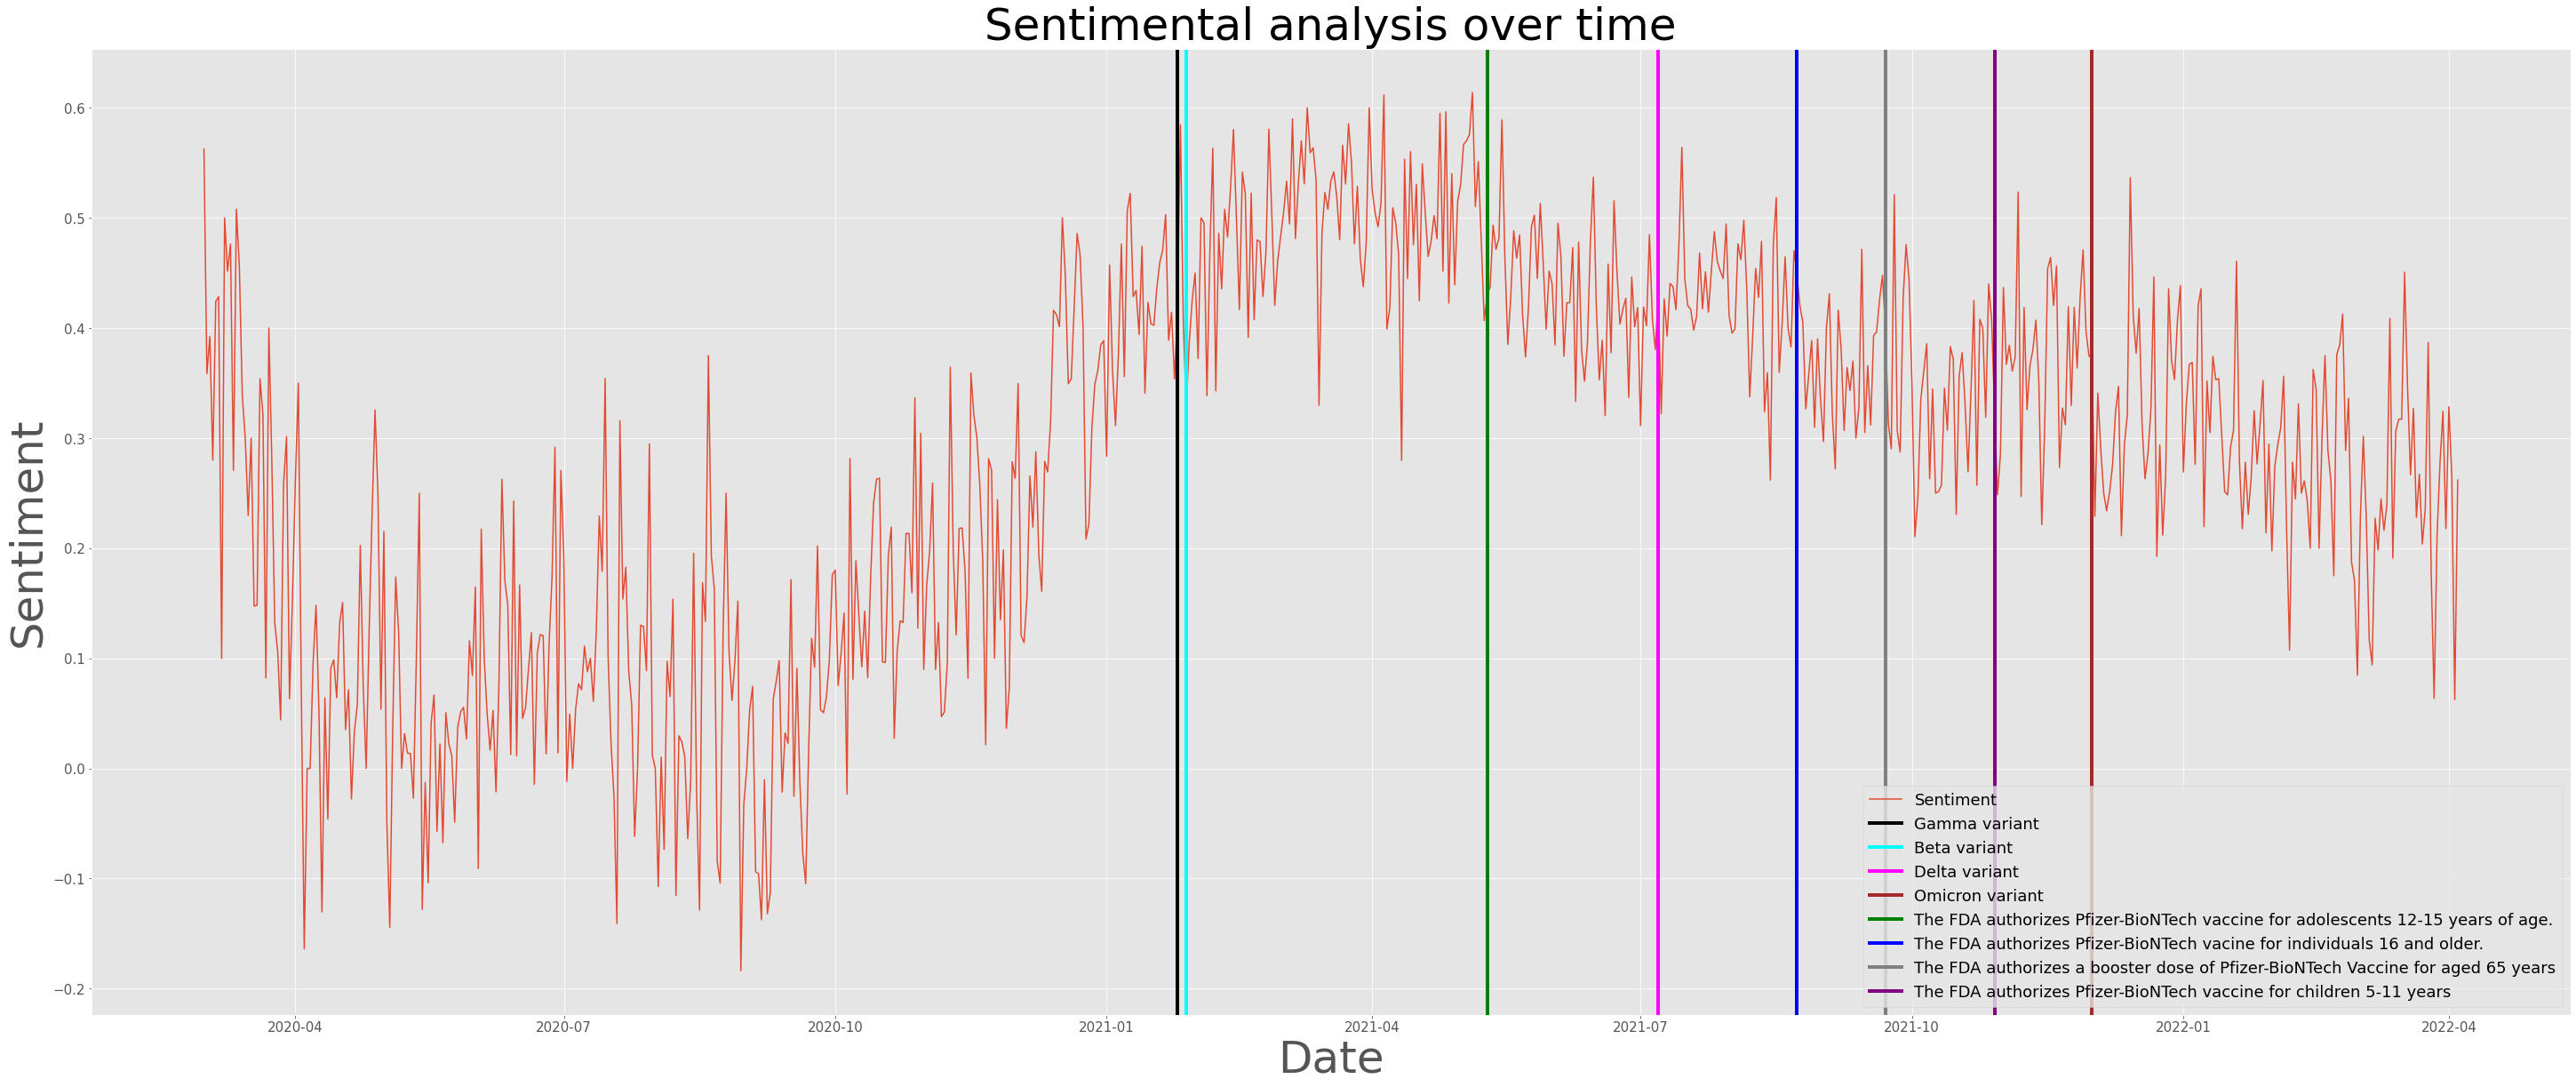

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

b_date_mean = new.groupby(by='Date').mean().reset_index()
b_date_mean = b_date_mean.set_index('Date')


b_date_mean["Sentiment"].plot(figsize=(50, 20), fontsize=15)
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})

plt.axvline(linewidth=4, x='2021-01-25', color = 'black', label = 'Gamma variant')
plt.axvline(linewidth=4, x='2021-01-28', color = 'cyan', label = 'Beta variant')
plt.axvline(linewidth=4, x='2021-07-07', color = 'magenta', label = 'Delta variant')
plt.axvline(x='2021-12-01', color = 'brown', linewidth=4, label = 'Omicron variant')
plt.axvline(x='2021-05-10', color = 'green', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for adolescents 12-15 years of age.')
plt.axvline(x='2021-08-23', color = 'blue', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vacine for individuals 16 and older.')
plt.axvline(x='2021-09-22', color = 'grey', linewidth=4, label = 'The FDA authorizes a booster dose of Pfizer-BioNTech Vaccine for aged 65 years')
plt.axvline(x='2021-10-29', color = 'purple', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for children 5-11 years')
plt.title('Sentimental analysis over time', fontdict = {'fontsize' : 50})
plt. legend(loc="lower right", fontsize= 18)
# plt.show()






In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

Text(0, 0.5, 'Sentiment')

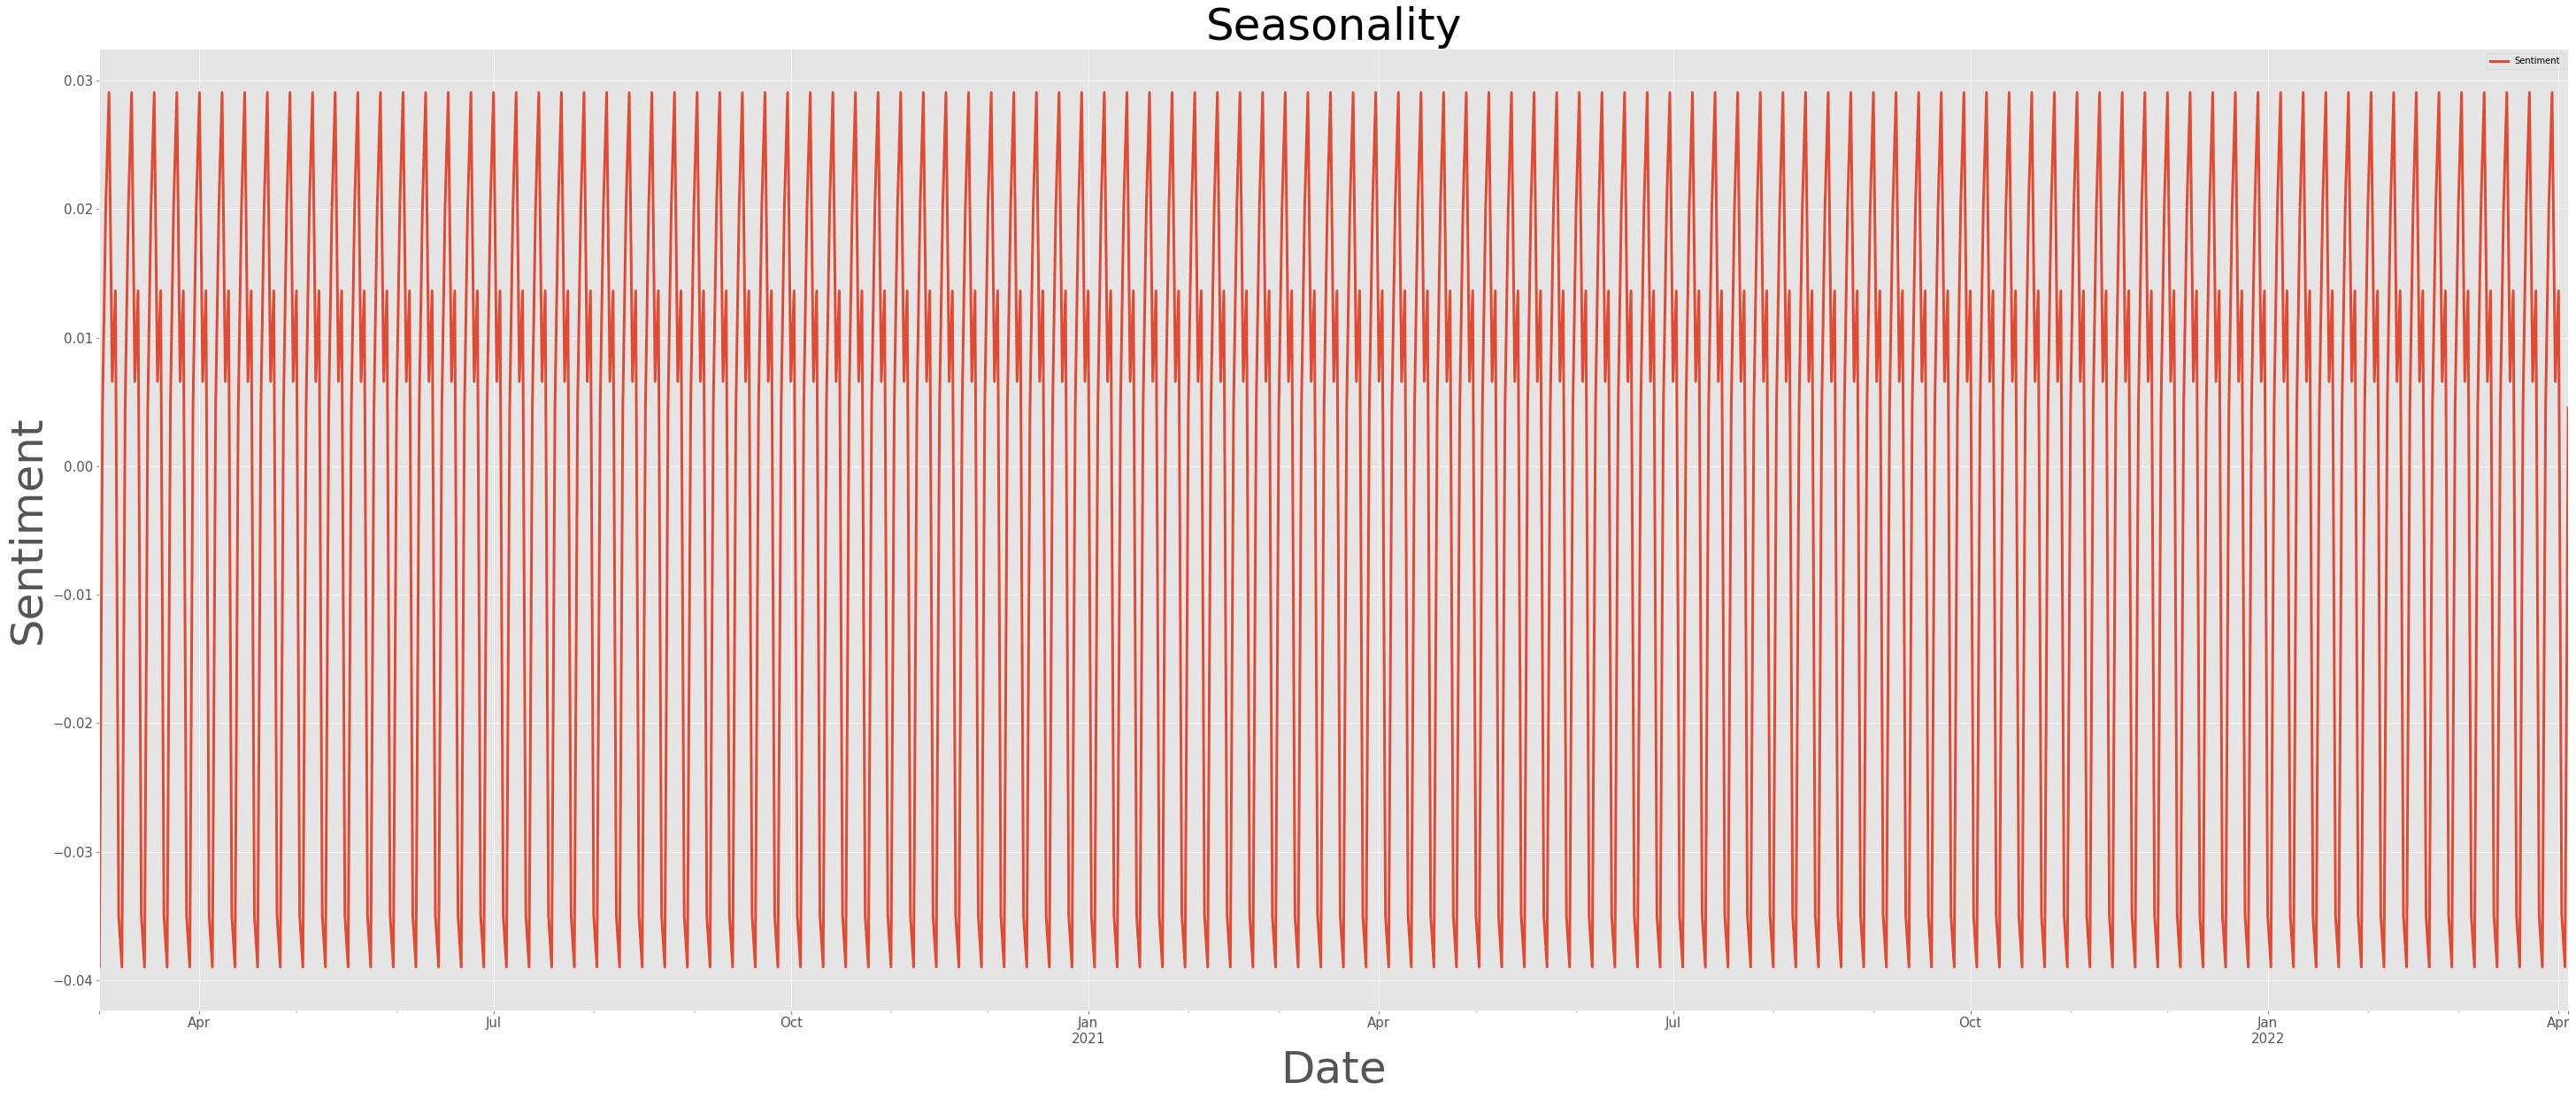

In [ ]:
# Init empty dict to store decompose results
seasonality_dict = {}

m = b_date_mean.asfreq('d')

for ts in m.columns:
    decompositions = sm.tsa.seasonal_decompose(m[ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict).plot(figsize=(50, 20), fontsize=15, linewidth=3)
# plt.ylabel("Sentiment")
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.title('Seasonality', fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})

In [ ]:
seasonality_dict["Sentiment"]

Date
2020-03-01   -0.038968
2020-03-02    0.004526
2020-03-03    0.020116
2020-03-04    0.029061
2020-03-05    0.006585
                ...   
2022-03-31    0.006585
2022-04-01    0.013636
2022-04-02   -0.034956
2022-04-03   -0.038968
2022-04-04    0.004526
Freq: D, Name: Sentiment, Length: 765, dtype: float64

Text(0, 0.5, 'Sentiment')

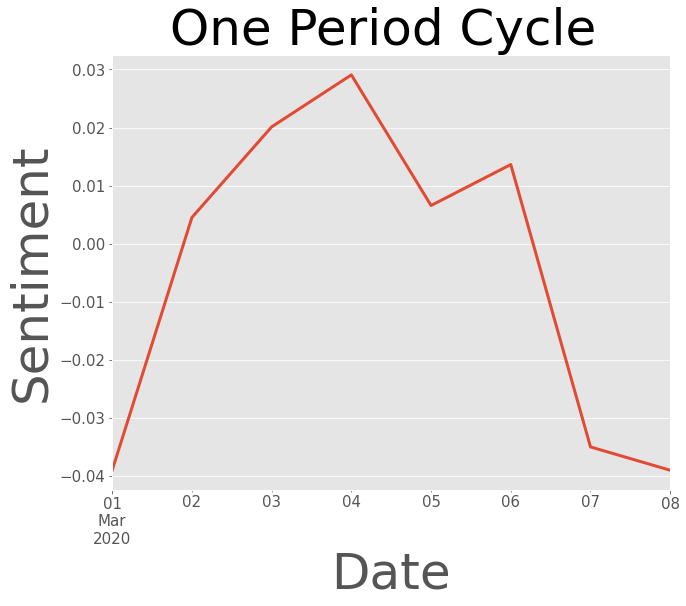

In [ ]:
seasonality_dict["Sentiment"].iloc[:8].plot(figsize=(10, 8), fontsize=15, linewidth=3)
# plt.ylabel("Sentiment")
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.title('One Period Cycle ', fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})


In [ ]:
seasonality_dict['Sentiment'].min()

-0.03896764033800291

In [ ]:
seasonality_dict['Sentiment'] == seasonality_dict['Sentiment'].min()

Date
2020-03-01     True
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
              ...  
2022-03-31    False
2022-04-01    False
2022-04-02    False
2022-04-03     True
2022-04-04    False
Freq: D, Name: Sentiment, Length: 765, dtype: bool

In [ ]:
seasonality_dict['Sentiment'][seasonality_dict['Sentiment'] == seasonality_dict['Sentiment'].min()]

Date
2020-03-01   -0.038968
2020-03-08   -0.038968
2020-03-15   -0.038968
2020-03-22   -0.038968
2020-03-29   -0.038968
                ...   
2022-03-06   -0.038968
2022-03-13   -0.038968
2022-03-20   -0.038968
2022-03-27   -0.038968
2022-04-03   -0.038968
Name: Sentiment, Length: 110, dtype: float64

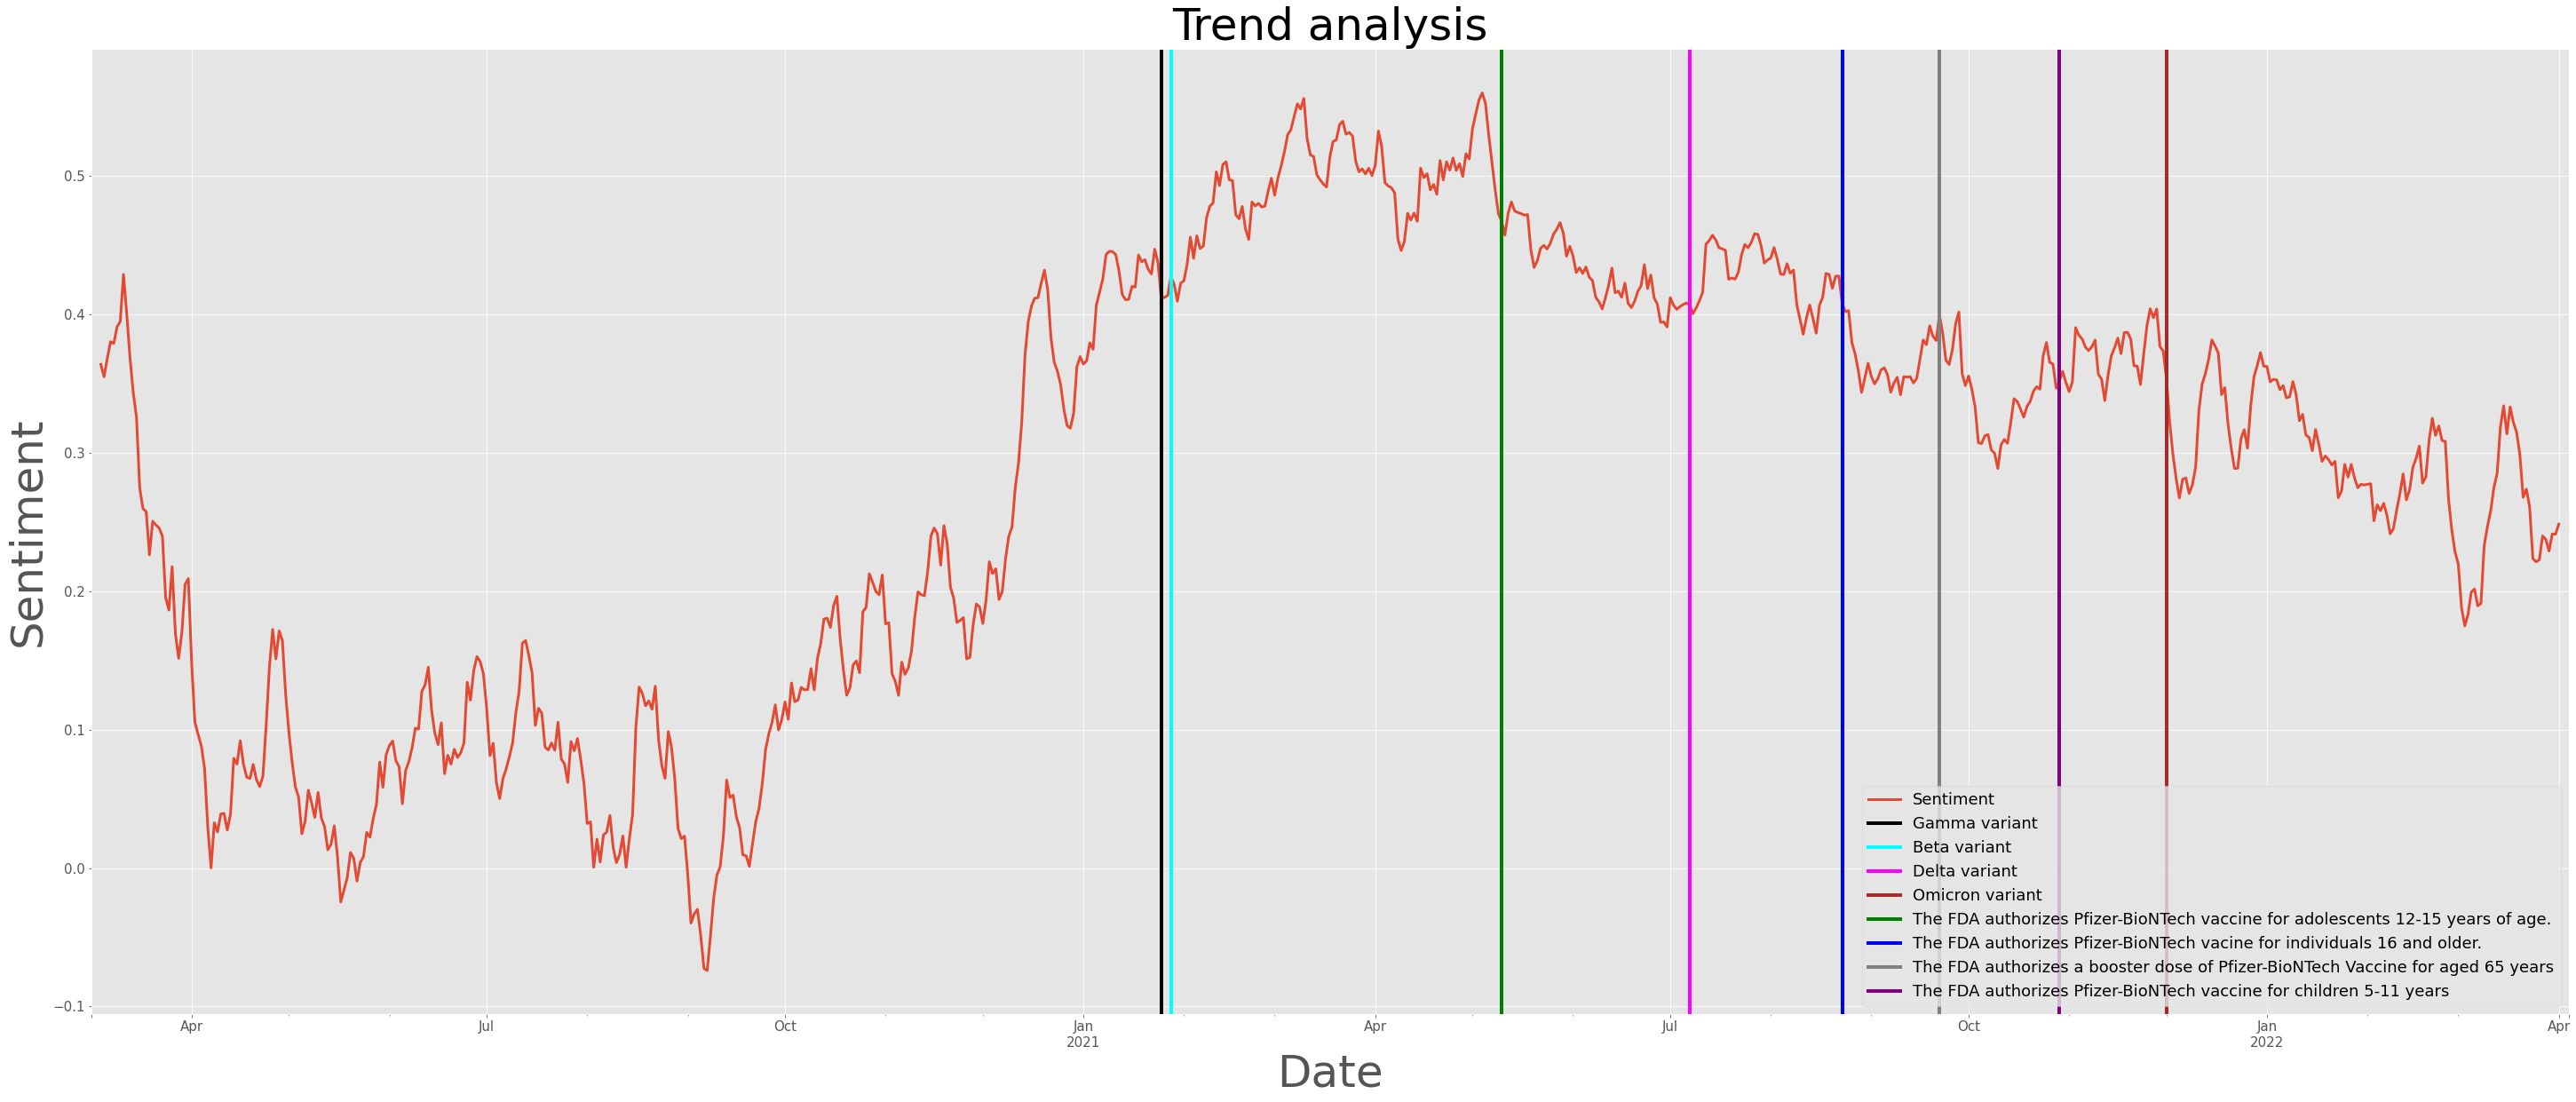

In [ ]:
trend_dict = {}

for ts in m.columns:
    decomposition = sm.tsa.seasonal_decompose(m[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(figsize=(50, 20), fontsize=15, linewidth=3);
plt.axvline(linewidth=4, x='2021-01-25', color = 'black', label = 'Gamma variant')
plt.axvline(linewidth=4, x='2021-01-28', color = 'cyan', label = 'Beta variant')
plt.axvline(linewidth=4, x='2021-07-07', color = 'magenta', label = 'Delta variant')
plt.axvline(x='2021-12-01', color = 'brown', linewidth=4, label = 'Omicron variant')
plt.axvline(x='2021-05-10', color = 'green', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for adolescents 12-15 years of age.')
plt.axvline(x='2021-08-23', color = 'blue', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vacine for individuals 16 and older.')
plt.axvline(x='2021-09-22', color = 'grey', linewidth=4, label = 'The FDA authorizes a booster dose of Pfizer-BioNTech Vaccine for aged 65 years')
plt.axvline(x='2021-10-29', color = 'purple', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for children 5-11 years')
plt. legend(loc="lower right", fontsize= 18)
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.title('Trend analysis', fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})

plt.show()


Text(0, 0.5, 'Sentiment')

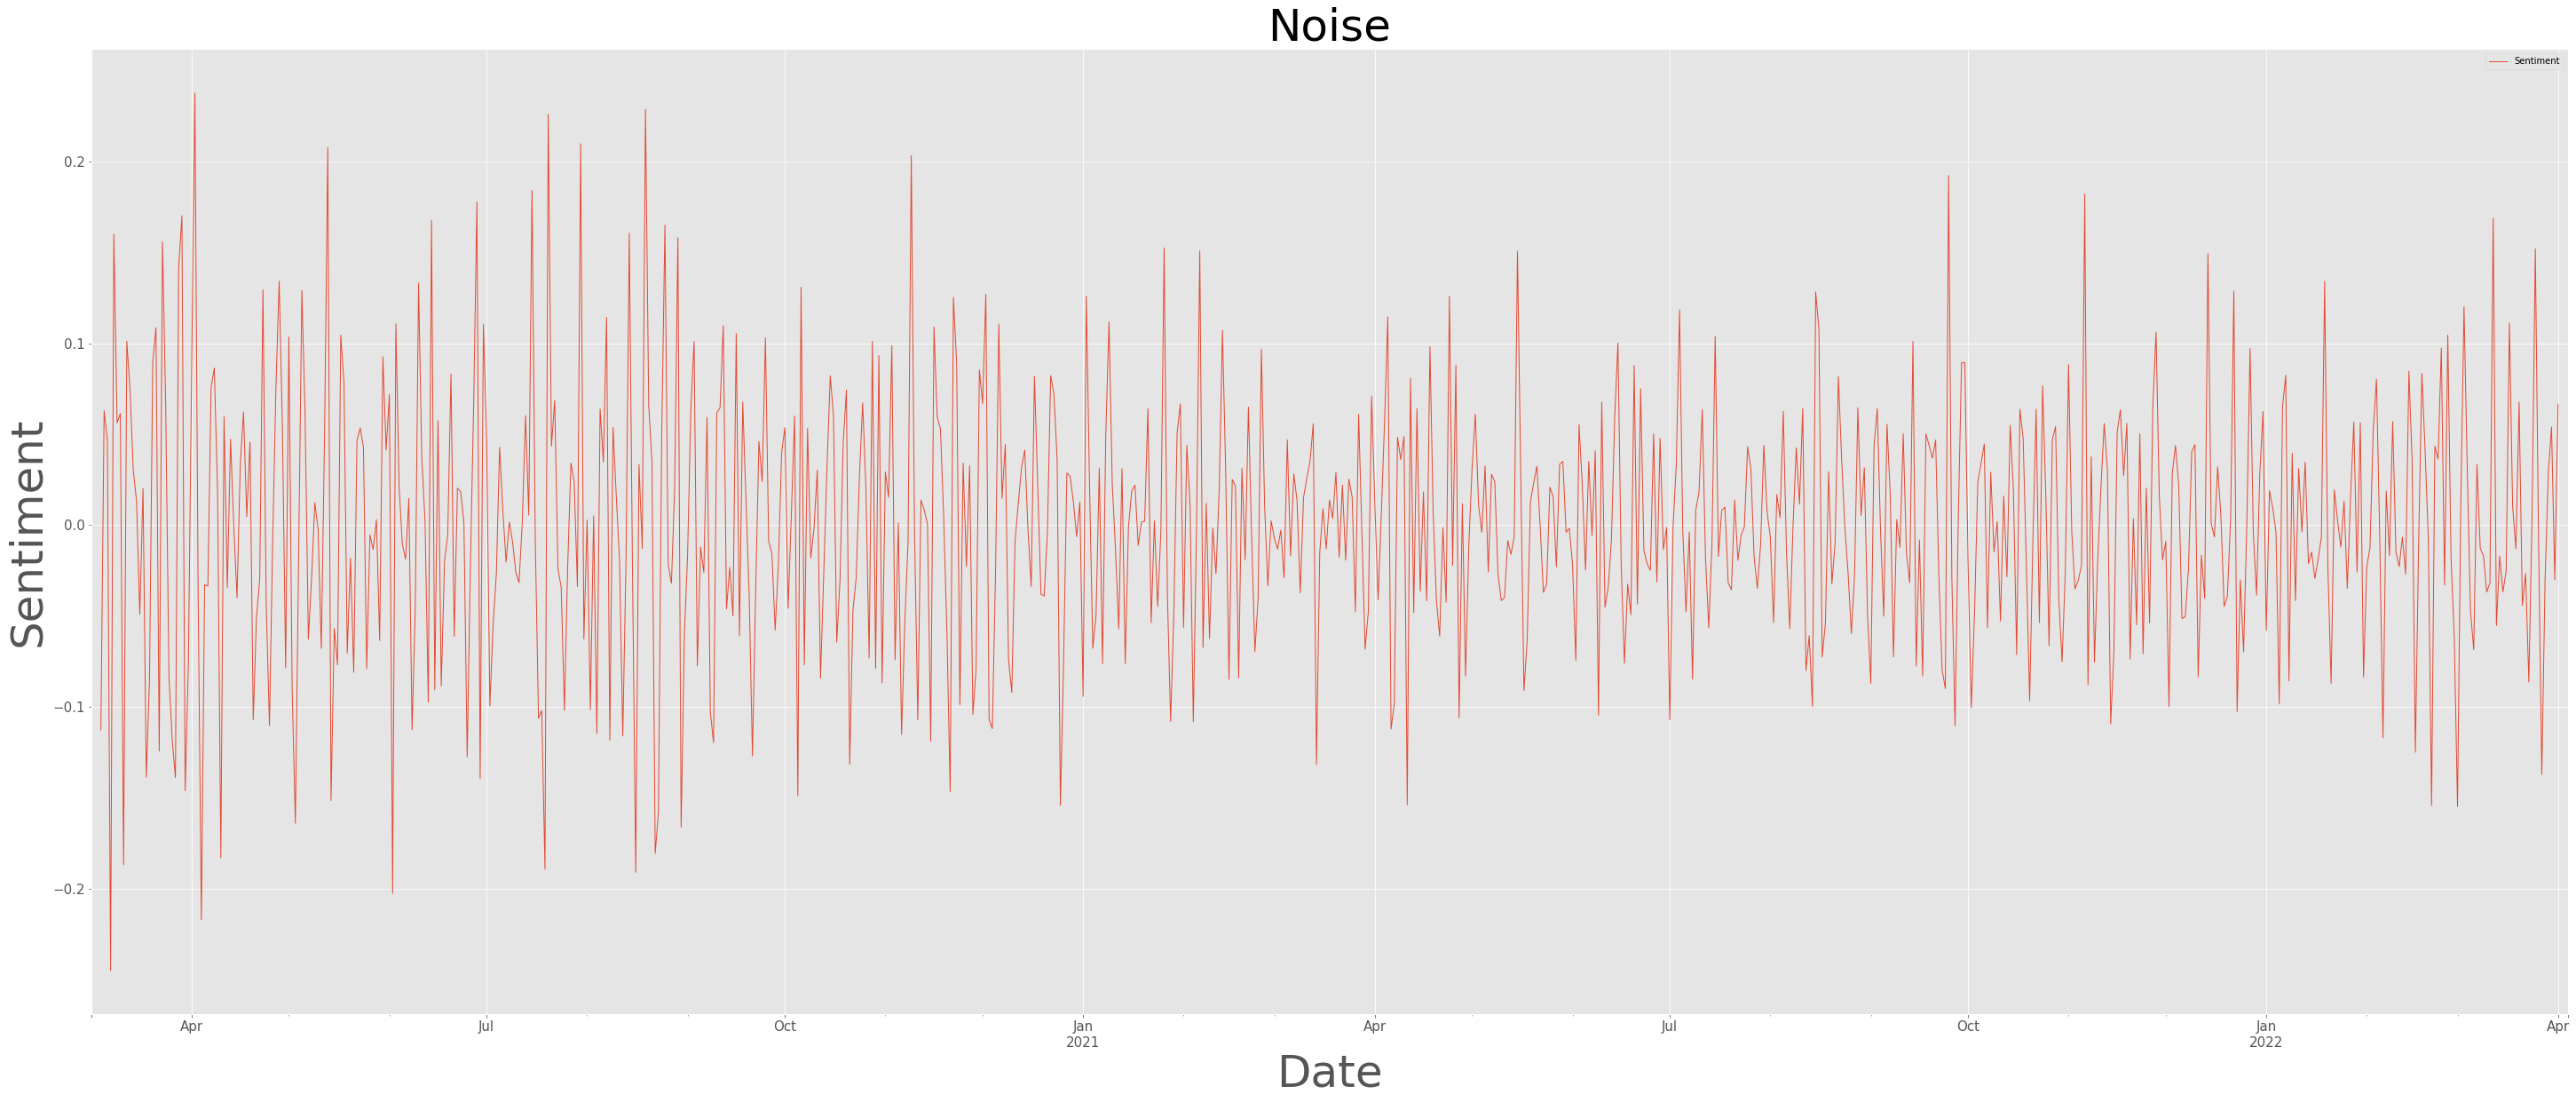

In [ ]:
resid_dict = {}

for ts in m.columns:
    decomposition = sm.tsa.seasonal_decompose(m[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(figsize=(50, 20), fontsize=15, linewidth=1);
# plt.ylabel("Sentiment")
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.title('Noise', fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})

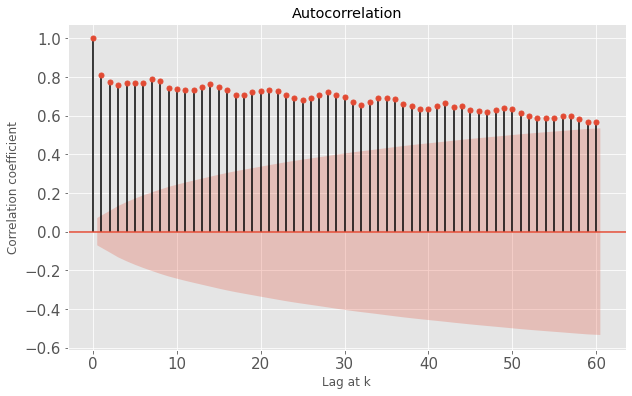

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(m["Sentiment"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

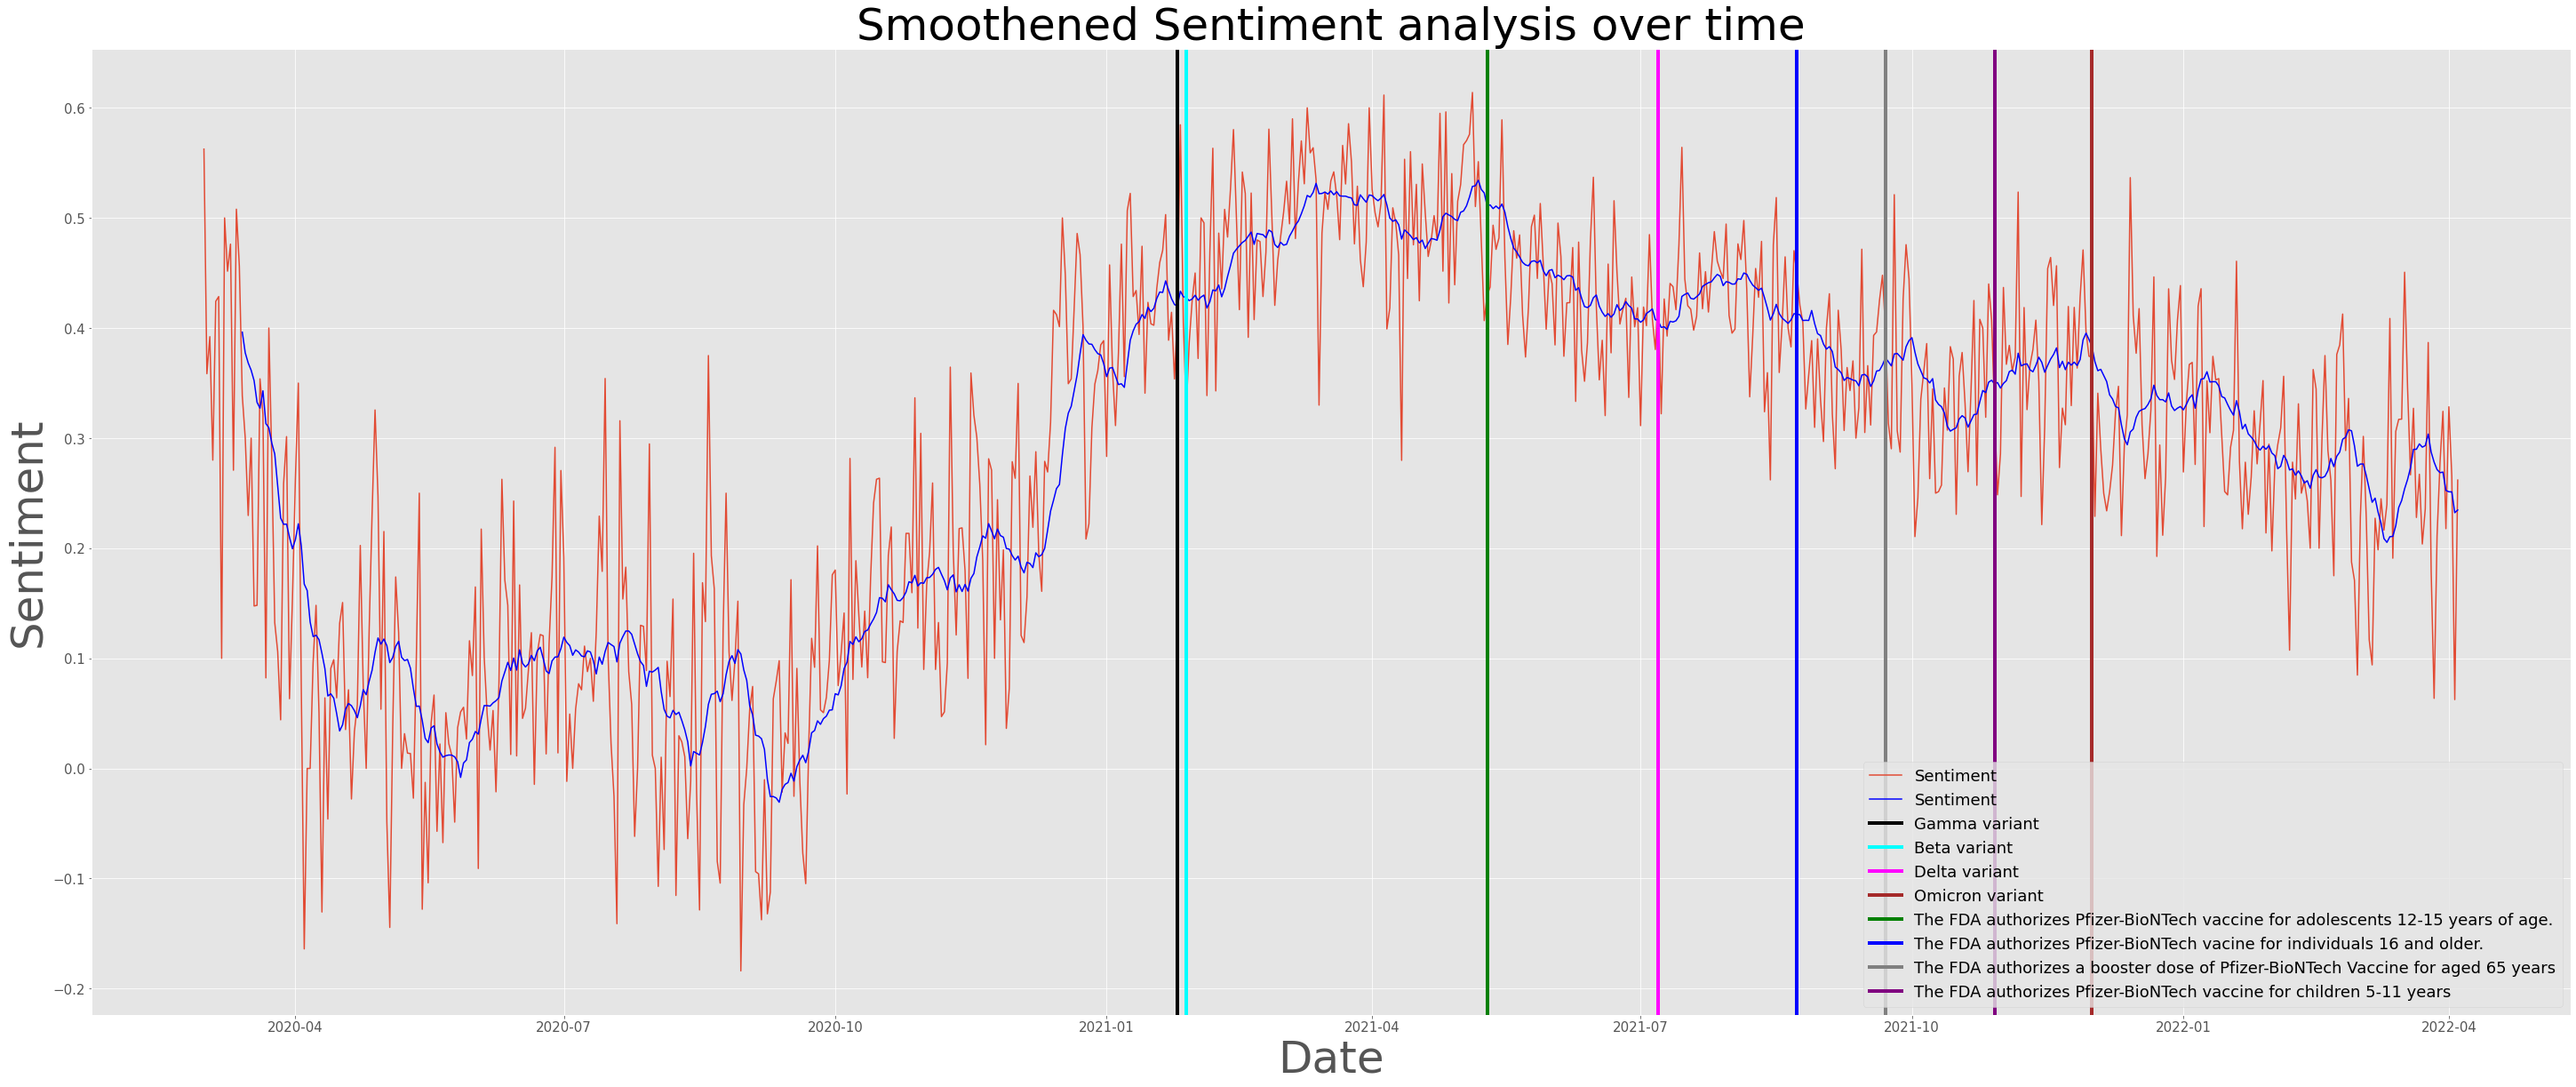

In [ ]:

from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# Tail-rolling average transform
rolling = b_date_mean.rolling(window=14)
rolling_mean = rolling.mean()
# print(rolling.head(10))
# plot original and transformed dataset
ax = b_date_mean.plot(figsize=(50, 20), fontsize=15)
rolling_mean.plot(ax=ax, color='blue',figsize=(50, 20), fontsize=15)

plt.axvline(linewidth=4, x='2021-01-25', color = 'black', label = 'Gamma variant')
plt.axvline(linewidth=4, x='2021-01-28', color = 'cyan', label = 'Beta variant')
plt.axvline(linewidth=4, x='2021-07-07', color = 'magenta', label = 'Delta variant')
plt.axvline(x='2021-12-01', color = 'brown', linewidth=4, label = 'Omicron variant')
plt.axvline(x='2021-05-10', color = 'green', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for adolescents 12-15 years of age.')
plt.axvline(x='2021-08-23', color = 'blue', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vacine for individuals 16 and older.')
plt.axvline(x='2021-09-22', color = 'grey', linewidth=4, label = 'The FDA authorizes a booster dose of Pfizer-BioNTech Vaccine for aged 65 years')
plt.axvline(x='2021-10-29', color = 'purple', linewidth=4, label = 'The FDA authorizes Pfizer-BioNTech vaccine for children 5-11 years')
plt. legend(loc="lower right", fontsize= 18)
plt.xlabel("Date", fontdict = {'fontsize' : 50})
plt.title('Smoothened Sentiment analysis over time', fontdict = {'fontsize' : 50})
plt.ylabel("Sentiment", fontdict = {'fontsize' : 50})

pyplot.show()

# rolling_mean

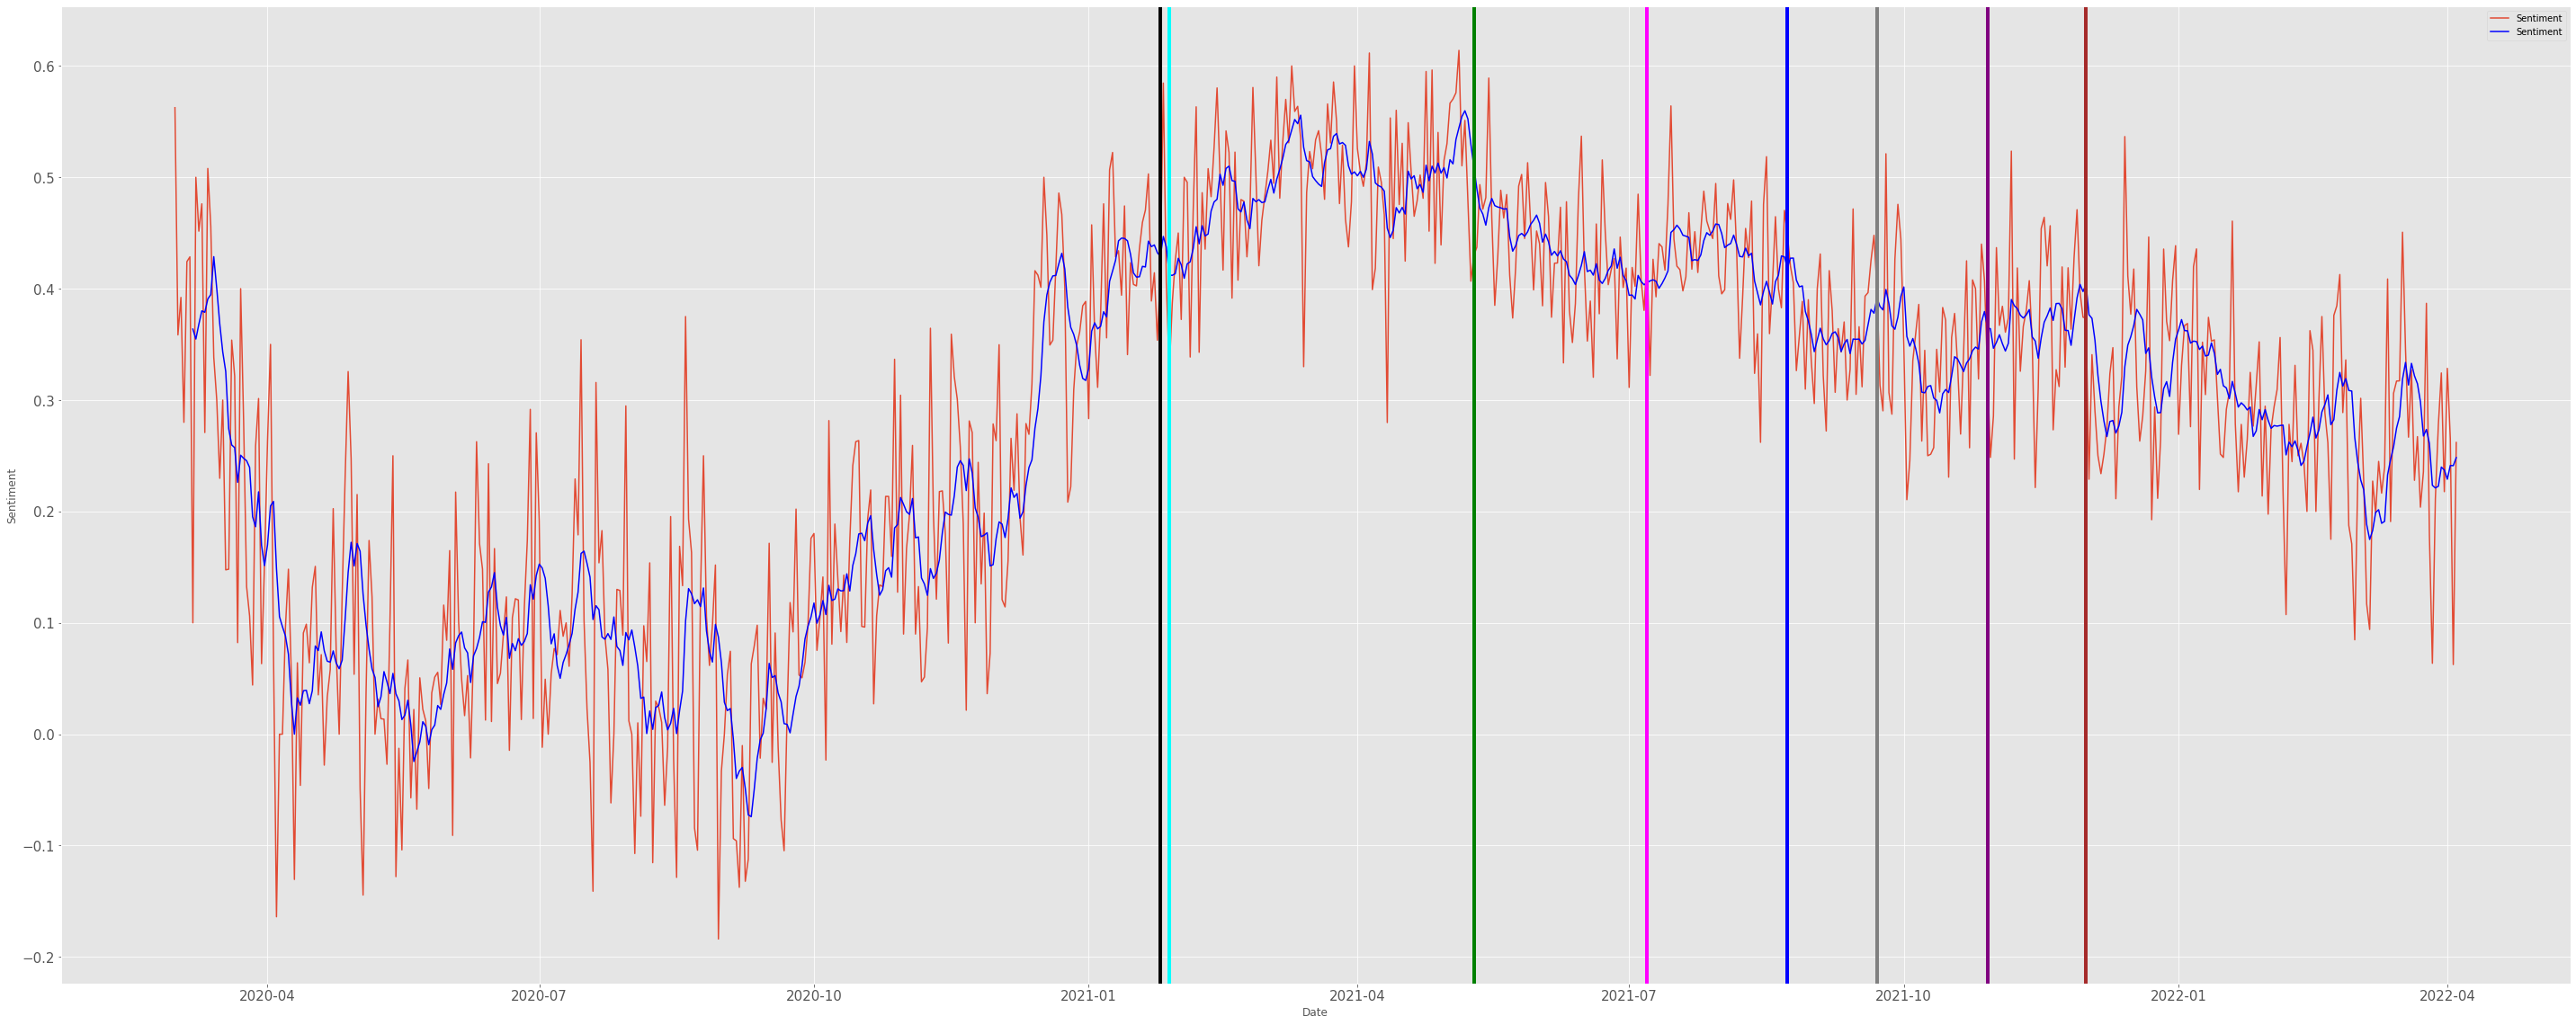

In [ ]:

from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# Tail-rolling average transform
rolling = b_date_mean.rolling(window=7)
rolling_mean = rolling.mean()
# print(rolling.head(10))
# plot original and transformed dataset
ax = b_date_mean.plot(figsize=(50, 20), fontsize=15)
rolling_mean.plot(ax=ax, color='blue',figsize=(50, 20), fontsize=15)


plt.axvline(linewidth=4, x='2021-01-25', color = 'black', label = 'Gamma variant')
plt.axvline(linewidth=4, x='2021-01-28', color = 'cyan', label = 'Gamma variant')
plt.axvline(linewidth=4, x='2021-07-07', color = 'magenta', label = 'Gamma variant')



plt.axvline(x='2021-12-01', color = 'brown', linewidth=4)
# plt.show()

plt.axvline(x='2021-05-10', color = 'green', linewidth=4)

plt.axvline(x='2021-08-23', color = 'blue', linewidth=4)


plt.axvline(x='2021-09-22', color = 'grey', linewidth=4)

plt.axvline(x='2021-10-29', color = 'purple', linewidth=4)
plt.ylabel("Sentiment")
pyplot.show()
